<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

**Цель**
* Защитить данные клиентов страховой компании. Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. П

## Загрузка данных

In [1]:
# импортттируем необходимые библиотеки, алгоритмы, функции
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
# общая информация о датасете
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
# выделяем общие признаки и целевой признак в отдельные переменные
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

<AxesSubplot:>

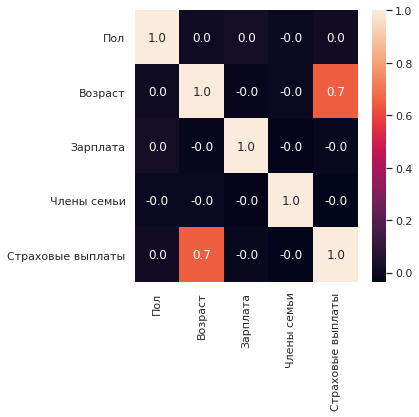

In [5]:
sns.set(rc={'figure.figsize': (5,5)})
sns.heatmap(data.corr(),annot = True, fmt = '.1f')

Корреляция средней силы между страховыми выплатами и возрастом клиента. Коэффициент корреляции составляет 0.7.

То есть корреляция между одним из признаков и целевым признаком

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не измениться.

**Обоснование:** 

* в формуле задачи обучения матрицу признаков X умножим на P-обратимую матрицу:


$$
w' = ((XP)^{T} (XP))^{-1} (XP)^{T} y 
$$ 


* Результат умножения не зависит от расстановки скобок (если не изменять порядок матриц)
* Нам известно, что матрица P обратима, тогда умножение матрицы на свою обратную матрицу равно единичной матрице E



$$
= (P^{T} X^{T} X P)^{-1} P^{T} X^{T} y = (P^{T} (X^{T} X) P)^{-1} P^{T} X^{T} y = P^{-1} (X^{T} X)^{-1} P^{T} P^{-1T} X^{T} y = P^{-1} (X^{T} X)^{-1} E X^{T} y = P^{-1} (X^{T} X)^{-1} X^{T} y
$$


* подставим  w в наше выражение
$$
w' = P^{-1} w
$$

* подставим в формулу предсказания 
$$
a = X P P^{-1} w = X E w = X w
$$


*  в итоге мы пришли к такму же выражению для предсказания. Это доказывает, то что при умножении признаков на обратимую матрицу качество линейной регрессии не изменится

## Алгоритм преобразования

**Алгоритм**

* Обучить модель линейной регресии без изменения матрицы признаков. Расчитать метрику R2.
* Создать обратимую рандомную матрицу и умножить признаки на нее
* Обучить модель на измененных данных и расчитать метрику R2.
* Сравнить метрики полученные в двух случаях.

**Обоснование**

По полученным выше данным, формула предсказаний не изменится, если домножить матрицу признаков на обратимую матрицу.

## Проверка алгоритма

In [6]:
# обучаем модель линейной регресии
model = LinearRegression()
model.fit(features, target)
prediction = model.predict(features)
print(r2_score(target, prediction))

0.42494550286668


Качество модели оцениваем по метрике R2. Для исходно обученной модели значение метрики составило 0.425.

In [7]:
#создаем случайную квадратную обратимую матрицу
matrix = np.random.normal(size=(4,4))

In [8]:
if np.linalg.det(matrix) !=0:
    print('Матрицы обратима')
else:
    print('Матрица необратитма')

Матрицы обратима


In [9]:
# умножаем признаки на обратимую матрицу
features_transform = features @ matrix

In [10]:
# обучаем модель и вычисляем метрику
model_mat = LinearRegression()
model_mat.fit(features_transform, target)
prediction = model_mat.predict(features_transform)
print(r2_score(target, prediction))

0.42494550286666966


Метрика R2 для модели с преобразованными признаками равна 0.425. Для исходно обученной модели значение метрики составило 0.425. Значение метрик одинаково, преобразование признаков не повлияло на качество.

# Вывод

В случае умножения признаков на обратимую матрицу качество модели не изменяется.